# Analyse des causes d'attrition chez TechNova Partners
## Étape 3 : Feature Engineering - Préparation des données pour la modélisation

**Objectif** : Préparer les données (X et y) pour l'entraînement de modèles de Machine Learning

## 1. Importation des bibliothèques

In [1]:
# 1. Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shap





from sklearn.metrics import (
    
)

#bibliothèque Python
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (classification_report, confusion_matrix, recall_score, f1_score,accuracy_score
                            accuracy_score, precision_score, f1_score,
                             classification_report, roc_auc_score
                            )

from sklearn.model_selection import train_test_split


# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Bibliothèques importées avec succès")

✅ Bibliothèques importées avec succès


/home/veron/OpenClassRoom/p4_ESN_uv/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Chargement du Dataset de l'analyse Exploratoire.

In [2]:
# 2. Chargement des données complètes
df = pd.read_csv('data_complete.csv')

print(f"📊 Dataset chargé : {df.shape[0]} lignes, {df.shape[1]} colonnes")
df.info()

📊 Dataset chargé : 1470 lignes, 30 colonnes
<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id_employee                                1470 non-null   int64  
 1   age                                        1470 non-null   int64  
 2   genre                                      1470 non-null   str    
 3   revenu_mensuel                             1470 non-null   int64  
 4   statut_marital                             1470 non-null   str    
 5   departement                                1470 non-null   str    
 6   poste                                      1470 non-null   str    
 7   nombre_experiences_precedentes             1470 non-null   int64  
 8   annee_experience_totale                    1470 non-null   int64  
 9   annees_dans_l_entreprise                   1470 non-null   int6

#### 2.1 Affichage de variables quantitatives et qualitatives

In [3]:
variables_quantitatives =df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_qualitatives = df.select_dtypes(include=['object', 'string']).columns.tolist()

print("🔢 VARIABLES QUANTITATIVES (numériques) :\n")
for i, col in enumerate(variables_quantitatives, 1):
    print(f"{i:2d}. {col}")

print(f"\n📝 VARIABLES QUALITATIVES (catégorielles) :\n")
for i, col in enumerate(variables_qualitatives, 1):
    print(f"{i:2d}. {col}")

🔢 VARIABLES QUANTITATIVES (numériques) :

 1. id_employee
 2. age
 3. revenu_mensuel
 4. nombre_experiences_precedentes
 5. annee_experience_totale
 6. annees_dans_l_entreprise
 7. annees_dans_le_poste_actuel
 8. satisfaction_employee_environnement
 9. note_evaluation_precedente
10. niveau_hierarchique_poste
11. satisfaction_employee_nature_travail
12. satisfaction_employee_equipe
13. satisfaction_employee_equilibre_pro_perso
14. note_evaluation_actuelle
15. augmentation_salaire_precedente
16. nombre_participation_pee
17. nb_formations_suivies
18. distance_domicile_travail
19. niveau_education
20. annees_depuis_la_derniere_promotion
21. annes_sous_responsable_actuel
22. frequence_deplacement_encoded

📝 VARIABLES QUALITATIVES (catégorielles) :

 1. genre
 2. statut_marital
 3. departement
 4. poste
 5. heure_supplementaires
 6. a_quitte_l_entreprise
 7. domaine_etude
 8. frequence_deplacement


## 3 .Encoding des variables qualitative , methode : OneHotEncoder

### 3.1 Analyse des variables catégorielles

In [23]:
print("="*80)
print("ÉTAPE 1 : ANALYSE DES VARIABLES CATÉGORIELLES")
print("="*80)

# Lister toutes les variables catégorielles (object)
variables_qualitatives = df.select_dtypes(include=['object', 'string']).columns.tolist()

print(f"\n📝 Variables catégorielles détectées : {len(variables_qualitatives)}\n")

# Analyser chaque variable
for col in variables_qualitatives:
    print(f"\n{'='*70}")
    print(f"📌 Variable : {col}")
    print(f"{'='*70}")
    
    # Valeurs uniques
    valeurs_uniques = df[col].dropna().unique()
    nb_valeurs = len(valeurs_uniques)
    
    print(f"Nombre de valeurs uniques : {nb_valeurs}")
    print(f"Valeurs : {list(valeurs_uniques)}")
    
    # Distribution
    print(f"\nDistribution :")
    distribution = df[col].value_counts()
    for val, count in distribution.items():
        pourcentage = (count / len(df)) * 100
        print(f"  - {val:30s} : {count:4d} ({pourcentage:5.2f}%)")
    
    # Valeurs manquantes
    nb_missing = df[col].isnull().sum()
    if nb_missing > 0:
        print(f"\n⚠️  Valeurs manquantes : {nb_missing} ({(nb_missing/len(df)*100):.2f}%)")
    else :
        print("pas de valeurs manquantes sur l'ensemble de Dataset")

ÉTAPE 1 : ANALYSE DES VARIABLES CATÉGORIELLES

📝 Variables catégorielles détectées : 8


📌 Variable : genre
Nombre de valeurs uniques : 2
Valeurs : ['F', 'M']

Distribution :
  - M                              :  882 (60.00%)
  - F                              :  588 (40.00%)
pas de valeurs manquantes sur l'ensemble de Dataset

📌 Variable : statut_marital
Nombre de valeurs uniques : 3
Valeurs : ['Célibataire', 'Marié(e)', 'Divorcé(e)']

Distribution :
  - Marié(e)                       :  673 (45.78%)
  - Célibataire                    :  470 (31.97%)
  - Divorcé(e)                     :  327 (22.24%)
pas de valeurs manquantes sur l'ensemble de Dataset

📌 Variable : departement
Nombre de valeurs uniques : 3
Valeurs : ['Commercial', 'Consulting', 'Ressources Humaines']

Distribution :
  - Consulting                     :  961 (65.37%)
  - Commercial                     :  446 (30.34%)
  - Ressources Humaines            :   63 ( 4.29%)
pas de valeurs manquantes sur l'ensemble de Dataset


---

On a 8 variables catégorielles.  
On observe aucune valeur aberrante.

---

### 3.2 Encodage des variables catégorielles

#### a/ encodage de la variable 'ordre_deplacement' en OrdinaleEncoder

In [33]:


# Définir les ordres logiques pour chaque variable ordinale

# 1. Fréquence de déplacement
ordre_deplacement = ['Aucun', 'Occasionnel', 'Frequent']

print("\n📊 Variables ordinales à encoder :\n")
print("1. frequence_deplacement")
print(f"   Ordre : {' < '.join(ordre_deplacement)}")
print(f"   Encodage : {dict(zip(ordre_deplacement, range(len(ordre_deplacement))))}")

# Encoder fréquence de déplacement
encoder_deplacement = OrdinalEncoder(categories=[ordre_deplacement])
df['frequence_deplacement_encoded'] = encoder_deplacement.fit_transform(
    df[['frequence_deplacement']]
).astype(int)

# Vérifier que toutes les valeurs sont bien présentes
print("\n🔍 Vérification des valeurs :")
print(df['frequence_deplacement_encoded'].value_counts())

print("\n✅ Encodage ordinal terminé !")


📊 Variables ordinales à encoder :

1. frequence_deplacement
   Ordre : Aucun < Occasionnel < Frequent
   Encodage : {'Aucun': 0, 'Occasionnel': 1, 'Frequent': 2}

🔍 Vérification des valeurs :
frequence_deplacement_encoded
1    1043
2     277
0     150
Name: count, dtype: int64

✅ Encodage ordinal terminé !


#### b/ Encodage simple
Pour les variables qui ont 2 catégories :
- genre
- heures supplémentaire
- a_quitte_l_entreprise (variable cible)

In [24]:
# 1. heure_supplementaires : Oui → 1, Non → 0
df['heure_supplementaires_encoded'] = (df['heure_supplementaires'] == 'Oui').astype(int)
df['target'] = (df['a_quitte_l_entreprise'] == 'Oui').astype(int)
df['genre_encoded'] = (df['genre'] == 'M').astype(int)

print("\n✅ Variables binaires encodées :")
print(df[['heure_supplementaires', 'heure_supplementaires_encoded']].value_counts().sort_index())
print("="*80)
print(df[['a_quitte_l_entreprise', 'target']].value_counts().sort_index())
print("="*80)
print(df[['genre', 'genre_encoded']].value_counts().sort_index())


ÉTAPE 2.4 : ENCODAGE DES VARIABLES BINAIRES

✅ Variables binaires encodées :
heure_supplementaires  heure_supplementaires_encoded
Non                    0                                1054
Oui                    1                                 416
Name: count, dtype: int64
a_quitte_l_entreprise  target
Non                    0         1233
Oui                    1          237
Name: count, dtype: int64
genre  genre_encoded
F      0                588
M      1                882
Name: count, dtype: int64


#### b/ Encodage des autres variables OneHotEncoder

In [7]:
variables_nominales = [
    'statut_marital',
    'departement',
    'poste',
    'domaine_etude'
]

print(f"\n📝 Variables nominales à encoder : {len(variables_nominales)}\n")
for var in variables_nominales:
    nb_categories = df[var].nunique()
    print(f"  - {var:25s} : {nb_categories} catégories")

encoder_nominal = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder_nominal.fit_transform(df[variables_nominales])
feature_names = encoder_nominal.get_feature_names_out(variables_nominales)

df_encoded = pd.DataFrame(
    encoded_array, 
    columns=feature_names,
    index=df.index
)

print(f"\n✅ OneHotEncoding terminé !")
print(f"   Nombre de nouvelles colonnes créées : {df_encoded.shape[1]}")
print(f"\n📋 Aperçu des colonnes créées :")
for i, col in enumerate(df_encoded.columns, 1):
    print(f"  {i:2d}. {col}")


ÉTAPE 2.3 : ENCODAGE DES VARIABLES NOMINALES

📝 Variables nominales à encoder : 4

  - statut_marital            : 3 catégories
  - departement               : 3 catégories
  - poste                     : 9 catégories
  - domaine_etude             : 6 catégories

✅ OneHotEncoding terminé !
   Nombre de nouvelles colonnes créées : 17

📋 Aperçu des colonnes créées :
   1. statut_marital_Divorcé(e)
   2. statut_marital_Marié(e)
   3. departement_Consulting
   4. departement_Ressources Humaines
   5. poste_Cadre Commercial
   6. poste_Consultant
   7. poste_Directeur Technique
   8. poste_Manager
   9. poste_Représentant Commercial
  10. poste_Ressources Humaines
  11. poste_Senior Manager
  12. poste_Tech Lead
  13. domaine_etude_Entrepreunariat
  14. domaine_etude_Infra & Cloud
  15. domaine_etude_Marketing
  16. domaine_etude_Ressources Humaines
  17. domaine_etude_Transformation Digitale


## 5. Création de la variable cible

In [8]:
y = (df['target'])
reste = (y == 0).sum()
parti = (y == 1).sum()
pct_parti= parti/len(y)*100
pct_reste = reste/len(y)*100

print("\n✅ Variable cible 'y' créée avec succès")
print(f"\nType : {type(y)}")
print(f"Shape : {y.shape}")
print(f"\n📊 Distribution de y :")
print(f"  - Restés (0) : {pct_reste:.2f}%")
print(f"  - Partis (1) : {pct_parti:.2f}%")


✅ Variable cible 'y' créée avec succès

Type : <class 'pandas.Series'>
Shape : (1470,)

📊 Distribution de y :
  - Restés (0) : 83.88%
  - Partis (1) : 16.12%


---

On voit qu'il y a une disparité entre les valeurs de la Target avec une prépondérance pour "restés"

---

## 6. Exclusion des features non utilisés
On va supprimer la feature Id, la target, et les features qualitative orginale qui ont été encodée.

In [43]:
print("="*80)
print("ÉTAPE 3 : CRÉATION DU DATAFRAME X")
print("="*80)

# 1. Lister les colonnes à EXCLURE de X
colonnes_a_exclure = [
    'id_employee',                   # Identifiant (pas prédictif)
    
    # Variable cible
    'a_quitte_l_entreprise', 
    'target',                       
    
    # Variables catégorielles ORIGINALES (avant encodage)
    'genre',
    'statut_marital',
    'departement',
    'poste',
    'domaine_etude',
    'heure_supplementaires',
    'frequence_deplacement',

    #la target
    'target',
]


print(f"\n❌ Colonnes à EXCLURE de X ({len(colonnes_a_exclure)}) :")
for col in colonnes_a_exclure:
    print(f"   - {col}")

# Variables numériques à garder
variables_numeriques = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_numeriques_a_garder = [col for col in variables_numeriques 
                                  if col not in colonnes_a_exclure]

print(f"\n✅ Variables NUMÉRIQUES à garder ({len(variables_numeriques_a_garder)}) :")
for i, col in enumerate(variables_numeriques_a_garder, 1):
    print(f"  {i:2d}. {col}")

# Créer X_numeriques
X_numeriques = df[variables_numeriques_a_garder]

print(f"\n📊 X_numeriques : {X_numeriques.shape}")

ÉTAPE 3 : CRÉATION DU DATAFRAME X

❌ Colonnes à EXCLURE de X (11) :
   - id_employee
   - a_quitte_l_entreprise
   - target
   - genre
   - statut_marital
   - departement
   - poste
   - domaine_etude
   - heure_supplementaires
   - frequence_deplacement
   - target

✅ Variables NUMÉRIQUES à garder (23) :
   1. age
   2. revenu_mensuel
   3. nombre_experiences_precedentes
   4. annee_experience_totale
   5. annees_dans_l_entreprise
   6. annees_dans_le_poste_actuel
   7. satisfaction_employee_environnement
   8. note_evaluation_precedente
   9. niveau_hierarchique_poste
  10. satisfaction_employee_nature_travail
  11. satisfaction_employee_equipe
  12. satisfaction_employee_equilibre_pro_perso
  13. note_evaluation_actuelle
  14. augmentation_salaire_precedente
  15. nombre_participation_pee
  16. nb_formations_suivies
  17. distance_domicile_travail
  18. niveau_education
  19. annees_depuis_la_derniere_promotion
  20. annes_sous_responsable_actuel
  21. frequence_deplacement_encoded

## 7. Fusion des features pour nouveau Dataset

In [44]:
# Concaténer toutes les features
X = pd.concat([
    X_numeriques,        
    df_encoded,             
], axis=1)

print(f"\n✅ DataFrame X créé avec succès !")
print(f"\n📊 Dimensions de X : {X.shape}")
print(f"   - {X.shape[0]} lignes (employés)")
print(f"   - {X.shape[1]} colonnes (features)")

display(X.columns.tolist()) 


✅ DataFrame X créé avec succès !

📊 Dimensions de X : (1470, 40)
   - 1470 lignes (employés)
   - 40 colonnes (features)


['age',
 'revenu_mensuel',
 'nombre_experiences_precedentes',
 'annee_experience_totale',
 'annees_dans_l_entreprise',
 'annees_dans_le_poste_actuel',
 'satisfaction_employee_environnement',
 'note_evaluation_precedente',
 'niveau_hierarchique_poste',
 'satisfaction_employee_nature_travail',
 'satisfaction_employee_equipe',
 'satisfaction_employee_equilibre_pro_perso',
 'note_evaluation_actuelle',
 'augmentation_salaire_precedente',
 'nombre_participation_pee',
 'nb_formations_suivies',
 'distance_domicile_travail',
 'niveau_education',
 'annees_depuis_la_derniere_promotion',
 'annes_sous_responsable_actuel',
 'frequence_deplacement_encoded',
 'heure_supplementaires_encoded',
 'genre_encoded',
 'statut_marital_Divorcé(e)',
 'statut_marital_Marié(e)',
 'departement_Consulting',
 'departement_Ressources Humaines',
 'poste_Cadre Commercial',
 'poste_Consultant',
 'poste_Directeur Technique',
 'poste_Manager',
 'poste_Représentant Commercial',
 'poste_Ressources Humaines',
 'poste_Senior M

---

On a bien exclus les features catégorielles originales et la target

---

## 8. Matrice de Corrélation de Pearson

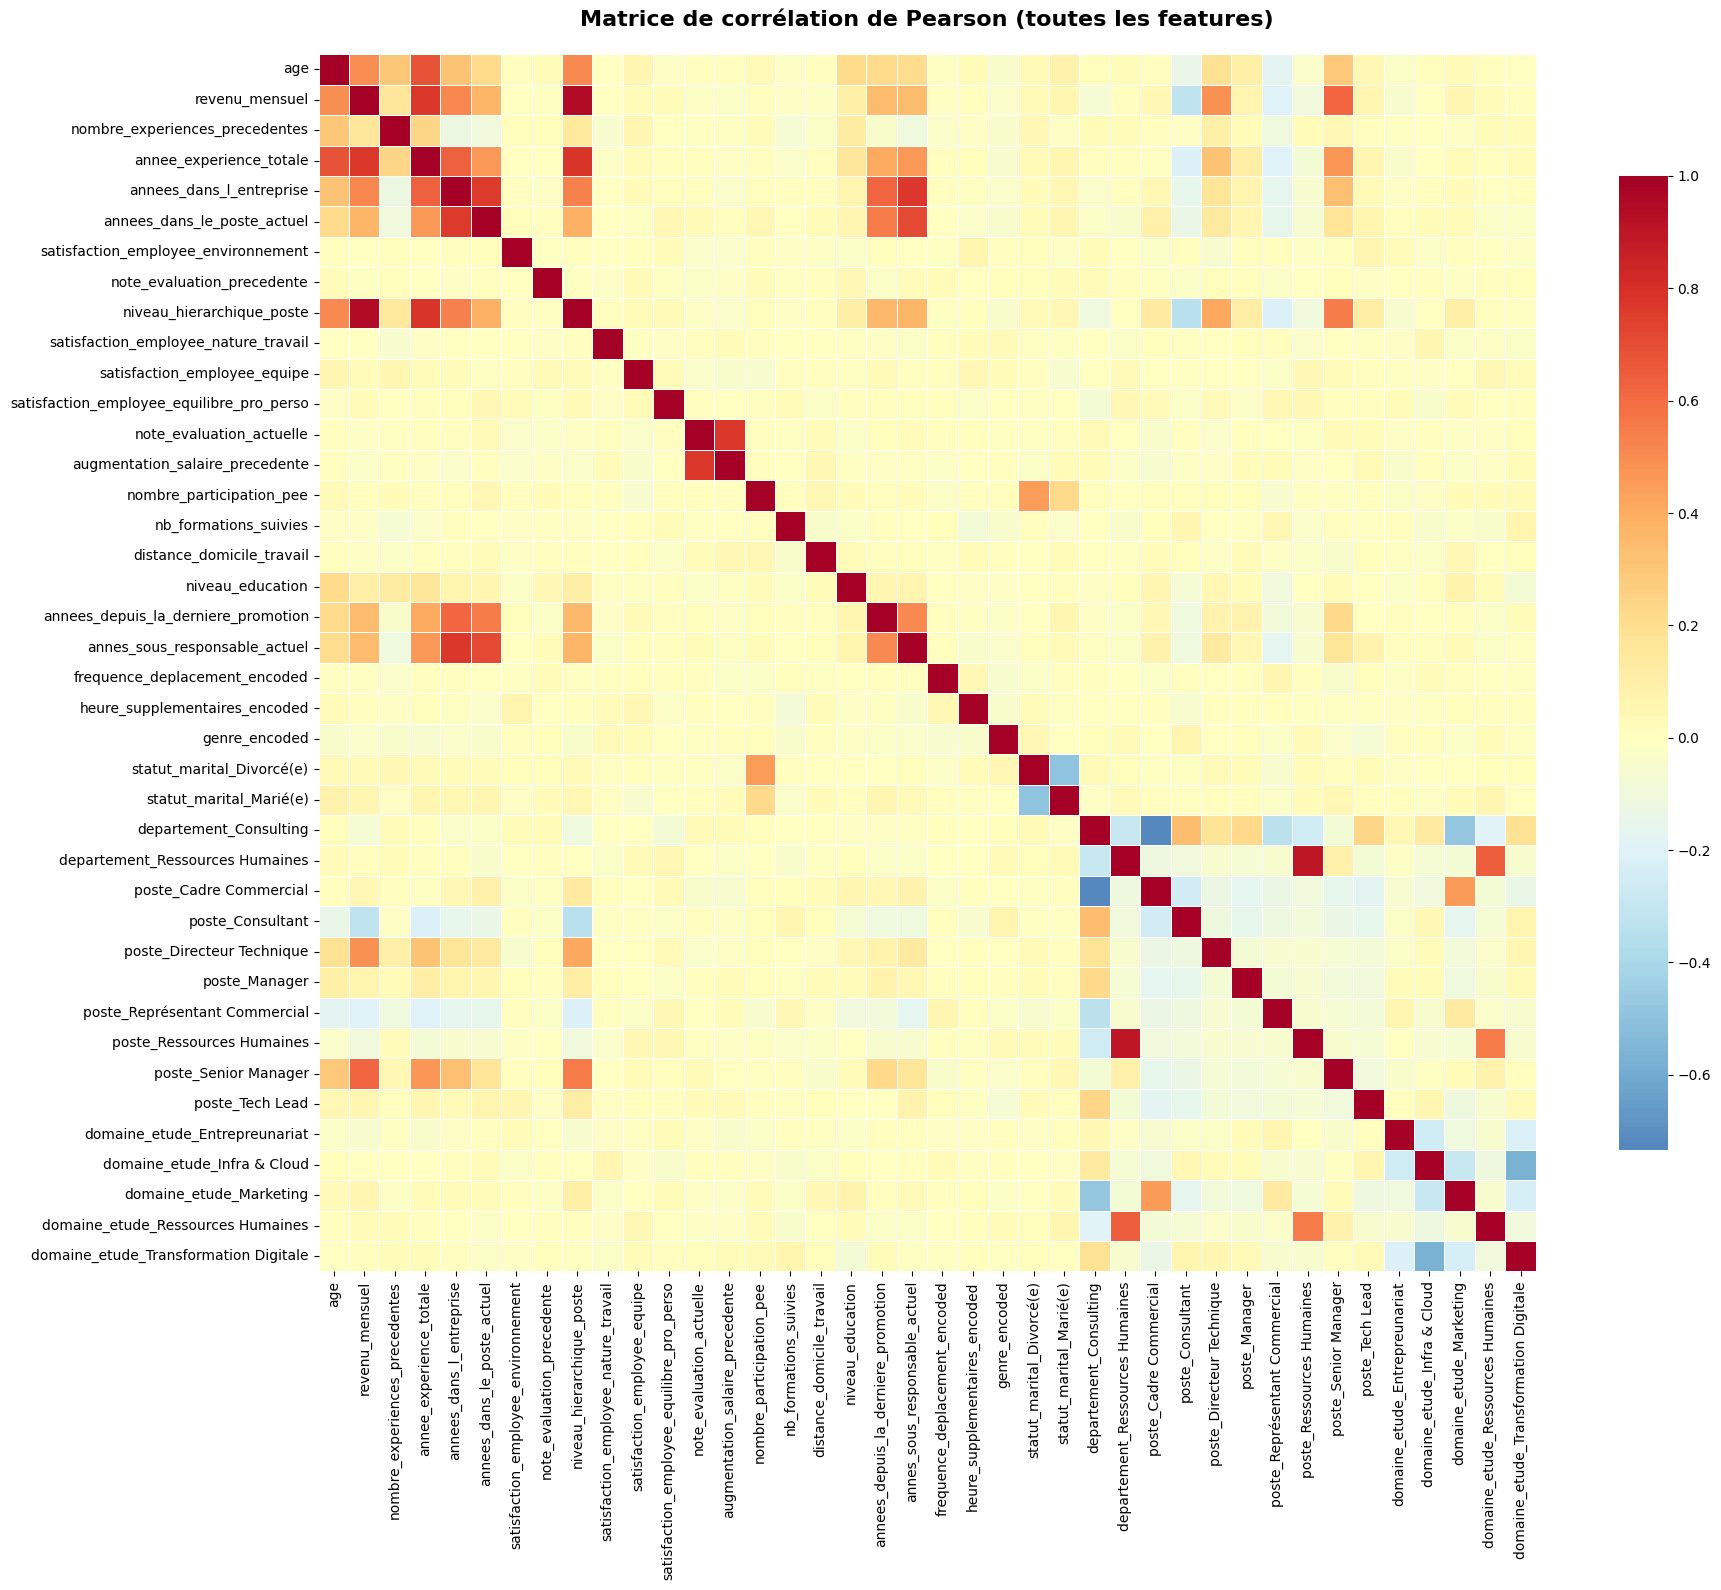


💡 Interprétation des couleurs :
   🔴 Rouge foncé   : Corrélation positive forte (proche de +1)
   🔵 Bleu foncé    : Corrélation négative forte (proche de -1)
   ⚪ Blanc/Jaune   : Pas de corrélation (proche de 0)


In [35]:
correlation_matrix = X.corr(method='pearson')

# Créer la heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(
    correlation_matrix, 
    annot=False,           
    fmt='.2f', 
    cmap='RdYlBu_r',      
    center=0,              
    square=True, 
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Matrice de corrélation de Pearson (toutes les features)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Interprétation des couleurs :")
print("   🔴 Rouge foncé   : Corrélation positive forte (proche de +1)")
print("   🔵 Bleu foncé    : Corrélation négative forte (proche de -1)")
print("   ⚪ Blanc/Jaune   : Pas de corrélation (proche de 0)")

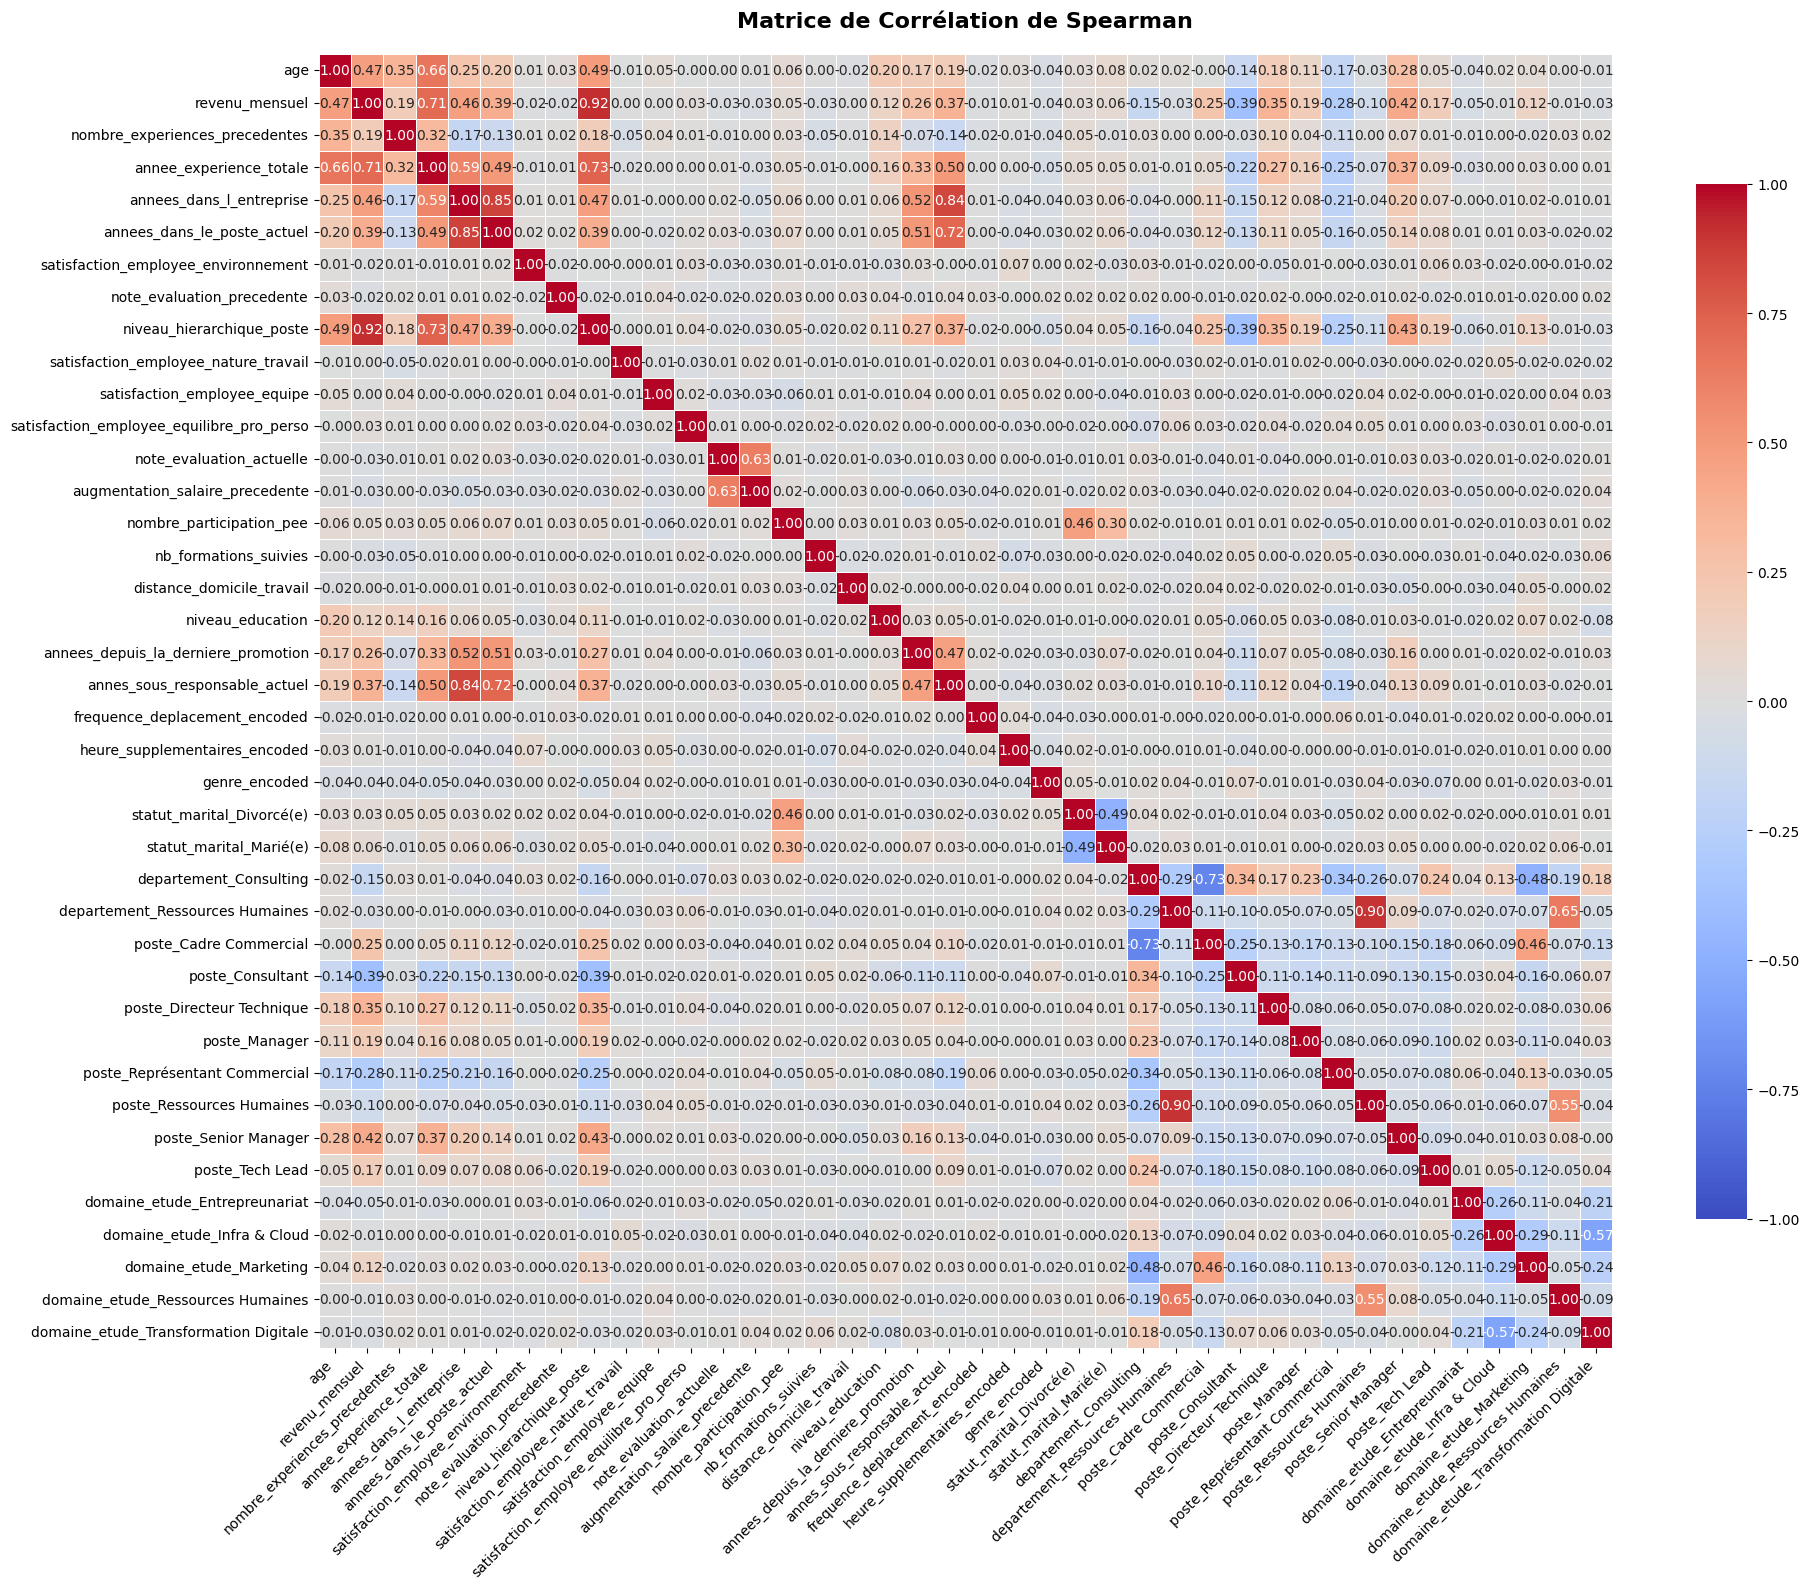

In [12]:
correlation_spearman = X.corr(method='spearman')
plt.figure(figsize=(20, 16))
sns.heatmap(
    correlation_spearman, 
    annot=True,           
    fmt='.2f',            
    cmap='coolwarm',     
    center=0,             
    vmin=-1, vmax=1,     
    square=True,        
    linewidths=0.5,      
    cbar_kws={"shrink": 0.8}  
)
plt.title('Matrice de Corrélation de Spearman', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

### B/ identification des corrélations fortes

In [36]:
seuil = 0.7

# Trouver les paires de features fortement corrélées
correlations_fortes = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        
        if abs(corr_value) >= seuil:
            correlations_fortes.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

# Créer un DataFrame pour affichage
df_corr_fortes = pd.DataFrame(correlations_fortes)

if len(df_corr_fortes) > 0:
    # Trier par valeur absolue de corrélation (décroissant)
    df_corr_fortes['Abs_Correlation'] = df_corr_fortes['Correlation'].abs()
    df_corr_fortes = df_corr_fortes.sort_values('Abs_Correlation', ascending=False)
    
    print(f"\n⚠️  {len(df_corr_fortes)} paires de features avec corrélation ≥ {seuil} :\n")
    print("="*80)
    
    
    # Afficher le DataFrame
    display(df_corr_fortes[['Feature_1', 'Feature_2', 'Correlation']].reset_index(drop=True))
    
else:
    print(f"\n✅ Aucune paire de features avec corrélation ≥ {seuil}")
    print("   → Pas de multicolinéarité importante détectée !")


⚠️  9 paires de features avec corrélation ≥ 0.7 :



,Feature_1,Feature_2,Correlation
0,revenu_mensuel,niveau_hierarchique_poste,0.950300
1,departement_Ressources Humaines,poste_Ressources Humaines,0.904983
2,annee_experience_totale,niveau_hierarchique_poste,0.782208
3,note_evaluation_actuelle,augmentation_salaire_precedente,0.773550
4,revenu_mensuel,annee_experience_totale,0.772893
5,annees_dans_l_entreprise,annes_sous_responsable_actuel,0.769212
6,annees_dans_l_entreprise,annees_dans_le_poste_actuel,0.758754
7,departement_Consulting,poste_Cadre Commercial,-0.733497
8,annees_dans_le_poste_actuel,annes_sous_responsable_actuel,0.714365


### B/ analyse des corrélations moyennes

In [37]:
print("\n" + "="*80)
print("CORRÉLATIONS MOYENNES (0.5 ≤ |r| < 0.8)")
print("="*80)

# Trouver les paires avec corrélation moyenne
seuil_min = 0.5
seuil_max = 0.8

correlations_moyennes = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        
        if seuil_min <= abs(corr_value) < seuil_max:
            correlations_moyennes.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

df_corr_moyennes = pd.DataFrame(correlations_moyennes)

if len(df_corr_moyennes) > 0:
    df_corr_moyennes['Abs_Correlation'] = df_corr_moyennes['Correlation'].abs()
    df_corr_moyennes = df_corr_moyennes.sort_values('Abs_Correlation', ascending=False)
    
    print(f"\n📊 {len(df_corr_moyennes)} paires avec corrélation moyenne ({seuil_min} ≤ |r| < {seuil_max})")
    
    # Afficher les 10 plus fortes
    print(f"\n🔝 Top 10 des corrélations moyennes les plus fortes :")
    print("="*80)
    display(df_corr_moyennes[['Feature_1', 'Feature_2', 'Correlation']].head(10).reset_index(drop=True))
else:
    print(f"\n✅ Aucune corrélation moyenne détectée")


CORRÉLATIONS MOYENNES (0.5 ≤ |r| < 0.8)

📊 20 paires avec corrélation moyenne (0.5 ≤ |r| < 0.8)

🔝 Top 10 des corrélations moyennes les plus fortes :


,Feature_1,Feature_2,Correlation
0,annee_experience_totale,niveau_hierarchique_poste,0.782208
1,note_evaluation_actuelle,augmentation_salaire_precedente,0.773550
2,revenu_mensuel,annee_experience_totale,0.772893
3,annees_dans_l_entreprise,annes_sous_responsable_actuel,0.769212
4,annees_dans_l_entreprise,annees_dans_le_poste_actuel,0.758754
5,departement_Consulting,poste_Cadre Commercial,-0.733497
6,annees_dans_le_poste_actuel,annes_sous_responsable_actuel,0.714365
7,age,annee_experience_totale,0.680381
8,departement_Ressources Humaines,domaine_etude_Ressources Humaines,0.646436
9,annee_experience_totale,annees_dans_l_entreprise,0.628133


## 9. Modélisation
Le déséquilibre important entre les employé aprtis et restés. Si ce déséquilibre n'est pas correctement traité, cela pourrait nuir à la modélisation prédictive.  

Pour garantir la fiabilité de ma modélisation, j'applique une séparation stratifiée des données

### 9.1. Séparation Train/Test et Stratification

In [50]:
print("="*80)
print("ÉTAPE 3.1 : SÉPARATION TRAIN/TEST")
print("="*80)

# Séparation train/test
print(f"\n⏳ Séparation des données en cours...")
print(f"  • 80% pour l'entraînement (TRAIN)")
print(f"  • 20% pour le test (TEST)")

X_train, X_test, y_train, y_test = train_test_split(
    X,                   
    y,                    
    test_size=0.2,        
    random_state=42,       
    stratify=y              
)

print("\n✅ Séparation effectuée avec succès !")

# Afficher les dimensions
print(f"\n📊 Dimensions des jeux de données :")
print(f"{'─'*80}")
print(f"  JEU D'ENTRAÎNEMENT (TRAIN) :")
print(f"    • X_train : {X_train.shape} ")
print(f"    • y_train : {y_train.shape}")
print(f"\n  JEU DE TEST (TEST) :")
print(f"    • X_test  : {X_test.shape}")
print(f"    • y_test  : {y_test.shape}")

print(f"\n✅ Vérification de la STRATIFICATION :")
print(f"{'─'*80}")

print(f"\n  TRAIN :")
print(f"    • Restés (0) : {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.2f}%)")
print(f"    • Partis (1) : {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.2f}%)")

print(f"\n  TEST :")
print(f"    • Restés (0) : {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.2f}%)")
print(f"    • Partis (1) : {(y_test==1).sum()} ({(y_test==1).sum()/len(y_test)*100:.2f}%)")

print(f"\n  ORIGINAL :")
print(f"    • Restés (0) : {(y==0).sum()} ({(y==0).sum()/len(y)*100:.2f}%)")
print(f"    • Partis (1) : {(y==1).sum()} ({(y==1).sum()/len(y)*100:.2f}%)")

ÉTAPE 3.1 : SÉPARATION TRAIN/TEST

⏳ Séparation des données en cours...
  • 80% pour l'entraînement (TRAIN)
  • 20% pour le test (TEST)

✅ Séparation effectuée avec succès !

📊 Dimensions des jeux de données :
────────────────────────────────────────────────────────────────────────────────
  JEU D'ENTRAÎNEMENT (TRAIN) :
    • X_train : (1176, 40) 
    • y_train : (1176,)

  JEU DE TEST (TEST) :
    • X_test  : (294, 40)
    • y_test  : (294,)

✅ Vérification de la STRATIFICATION :
────────────────────────────────────────────────────────────────────────────────

  TRAIN :
    • Restés (0) : 986 (83.84%)
    • Partis (1) : 190 (16.16%)

  TEST :
    • Restés (0) : 247 (84.01%)
    • Partis (1) : 47 (15.99%)

  ORIGINAL :
    • Restés (0) : 1233 (83.88%)
    • Partis (1) : 237 (16.12%)


### 9.2 Test des modèles

  1. Dummy (Baseline)
  2. Logistic Regression
  3. Decision Tree
  4. Random Forest
  5. Gradient Boosting

✅ Total : 5 modèles

────────────────────────────────────────────────────────────────────────────────
🔄 Modèle en cours : Dummy (Baseline)
────────────────────────────────────────────────────────────────────────────────
  ✅ Terminé
     • Accuracy (test) : 0.8401
     • Recall (test) : 0.0000
     • F1-Score (test) : 0.0000

────────────────────────────────────────────────────────────────────────────────
🔄 Modèle en cours : Logistic Regression
────────────────────────────────────────────────────────────────────────────────
  ✅ Terminé
     • Accuracy (test) : 0.8878
     • Recall (test) : 0.3617
     • F1-Score (test) : 0.5075

────────────────────────────────────────────────────────────────────────────────
🔄 Modèle en cours : Decision Tree
────────────────────────────────────────────────────────────────────────────────
  ✅ Terminé
     • Accuracy (test) : 0.7857
     • Recall (

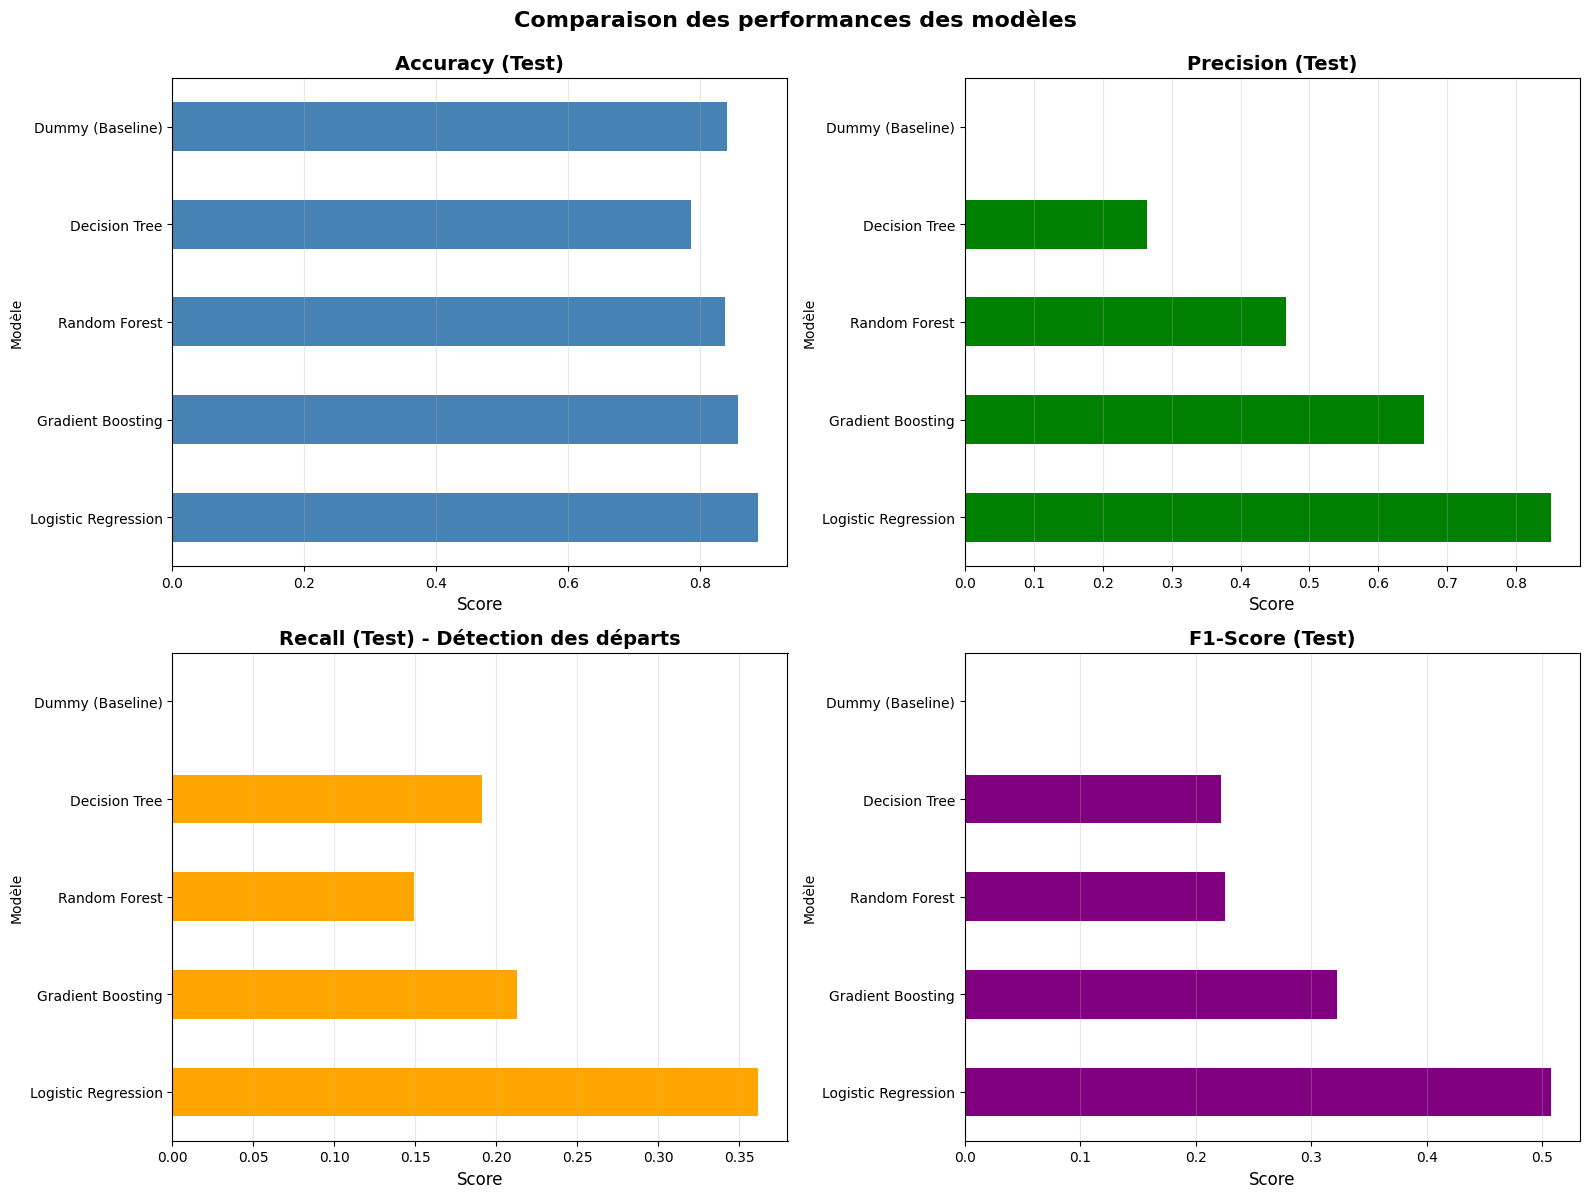

✅ Graphique 1/3 : Métriques principales


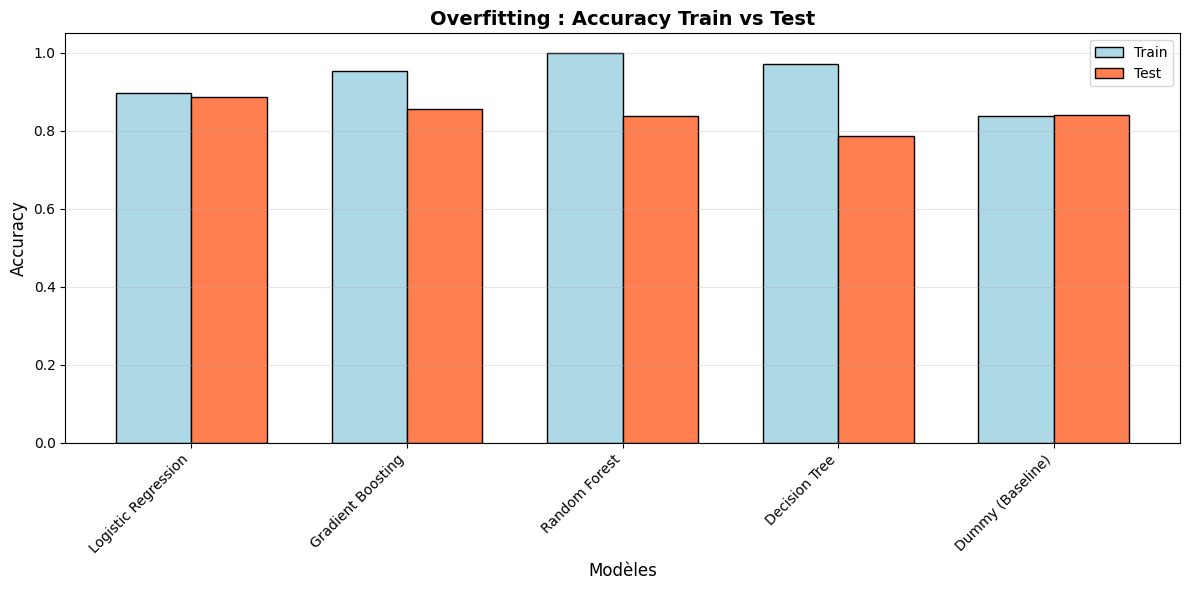

✅ Graphique 2/3 : Overfitting (Train vs Test)


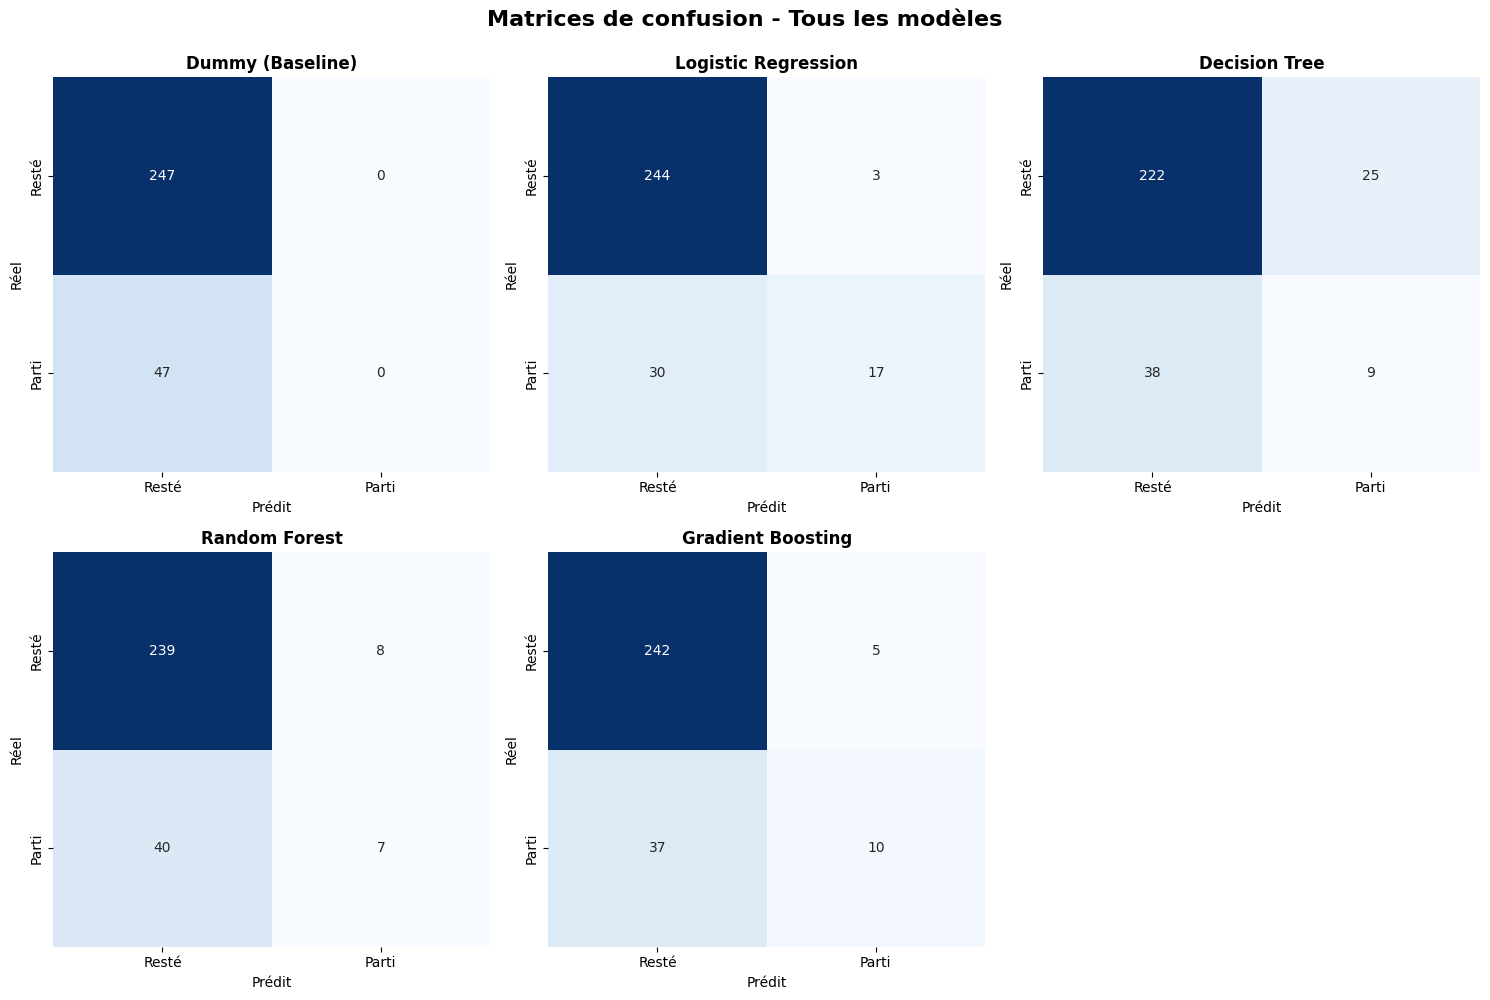

✅ Graphique 3/3 : Matrices de confusion

🏆 ANALYSE DÉTAILLÉE : Logistic Regression

📋 Classification Report :
────────────────────────────────────────────────────────────────────────────────
              precision    recall  f1-score   support

   Resté (0)     0.8905    0.9879    0.9367       247
   Parti (1)     0.8500    0.3617    0.5075        47

    accuracy                         0.8878       294
   macro avg     0.8703    0.6748    0.7221       294
weighted avg     0.8840    0.8878    0.8680       294

📊 Matrice de confusion détaillée :
────────────────────────────────────────────────────────────────────────────────
  TN (Restés bien prédits) : 244
  FP (Fausses alertes) : 3
  FN (Départs manqués) : 30
  TP (Départs détectés) : 17

💡 INTERPRÉTATION POUR TECHNOVA

✅ Le modèle Logistic Regression est le plus performant :
   • F1-Score : 50.75%
   • Recall : 36.17% → Détecte 36% des départs
   • Precision : 85.00% → 85% des alertes sont vraies

📊 Sur 47 employés qui sont partis 

In [42]:
modeles = {
    'Dummy (Baseline)': DummyClassifier(strategy='most_frequent', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
}

for i, nom in enumerate(modeles.keys(), 1):
    print(f"  {i}. {nom}")

print(f"\n✅ Total : {len(modeles)} modèles")

resultats = []
matrices_confusion = {}
predictions = {}

for nom_modele, modele in modeles.items():
    print(f"\n{'─'*80}")
    print(f"🔄 Modèle en cours : {nom_modele}")
    print(f"{'─'*80}")
    
    modele.fit(X_train, y_train)

    y_pred_train = modele.predict(X_train)
    y_pred_test = modele.predict(X_test)
    
    # Probabilités (pour ROC-AUC)
    try:
        y_proba_test = modele.predict_proba(X_test)[:, 1]
    except:
        y_proba_test = y_pred_test  
    
    # Métriques sur TRAIN
    acc_train = accuracy_score(y_train, y_pred_train)
    
    # Métriques sur TEST
    acc_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, zero_division=0)
    recall_test = recall_score(y_test, y_pred_test, zero_division=0)
    f1_test = f1_score(y_test, y_pred_test, zero_division=0)
    
    try:
        roc_auc_test = roc_auc_score(y_test, y_proba_test)
    except:
        roc_auc_test = 0.5  # Score aléatoire pour Dummy
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred_test)
    matrices_confusion[nom_modele] = cm
    predictions[nom_modele] = y_pred_test
    
    # Calculer overfitting
    overfitting = acc_train - acc_test
    
    # Stocker les résultats
    resultats.append({
        'Modèle': nom_modele,
        'Accuracy_train': acc_train,
        'Accuracy_test': acc_test,
        'Precision': precision_test,
        'Recall': recall_test,
        'F1-Score': f1_test,
        'ROC-AUC': roc_auc_test,
        'Overfitting': overfitting
    })
    
    # Afficher résumé
    print(f"  ✅ Terminé")
    print(f"     • Accuracy (test) : {acc_test:.4f}")
    print(f"     • Recall (test) : {recall_test:.4f}")
    print(f"     • F1-Score (test) : {f1_test:.4f}")

print("\n" + "="*80)
print("✅ TOUS LES MODÈLES ONT ÉTÉ ENTRAÎNÉS ET ÉVALUÉS")
print("="*80)


print("\n" + "="*80)
print("📊 TABLEAU COMPARATIF DES PERFORMANCES")
print("="*80)

df_resultats = pd.DataFrame(resultats)

# Trier par F1-Score (métrique équilibrée)
df_resultats = df_resultats.sort_values('F1-Score', ascending=False)

print("\n" + df_resultats.to_string(index=False))

# meilleur modèle
meilleur_modele = df_resultats.iloc[0]['Modèle']
print(f"\n🏆 MEILLEUR MODÈLE (F1-Score) : {meilleur_modele}")

# meilleur Recall
df_resultats_recall = df_resultats.sort_values('Recall', ascending=False)
meilleur_recall = df_resultats_recall.iloc[0]['Modèle']
print(f"🎯 MEILLEUR RECALL : {meilleur_recall} (Recall = {df_resultats_recall.iloc[0]['Recall']:.4f})")


print("\n" + "="*80)
print("📊 GÉNÉRATION DES VISUALISATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy
df_resultats.plot(x='Modèle', y='Accuracy_test', kind='barh', ax=axes[0, 0], 
                  color='steelblue', legend=False)
axes[0, 0].set_title('Accuracy (Test)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Score', fontsize=12)
axes[0, 0].grid(axis='x', alpha=0.3)

# Precision
df_resultats.plot(x='Modèle', y='Precision', kind='barh', ax=axes[0, 1], 
                  color='green', legend=False)
axes[0, 1].set_title('Precision (Test)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Score', fontsize=12)
axes[0, 1].grid(axis='x', alpha=0.3)

# Recall
df_resultats.plot(x='Modèle', y='Recall', kind='barh', ax=axes[1, 0], 
                  color='orange', legend=False)
axes[1, 0].set_title('Recall (Test) - Détection des départs', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Score', fontsize=12)
axes[1, 0].grid(axis='x', alpha=0.3)

# F1-Score
df_resultats.plot(x='Modèle', y='F1-Score', kind='barh', ax=axes[1, 1], 
                  color='purple', legend=False)
axes[1, 1].set_title('F1-Score (Test)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Score', fontsize=12)
axes[1, 1].grid(axis='x', alpha=0.3)

plt.suptitle('Comparaison des performances des modèles', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Graphique 1/3 : Métriques principales")

# GRAPHIQUE 2 : Overfitting (Train vs Test)
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(df_resultats))
width = 0.35

bars1 = ax.bar(x - width/2, df_resultats['Accuracy_train'], width, 
               label='Train', color='lightblue', edgecolor='black')
bars2 = ax.bar(x + width/2, df_resultats['Accuracy_test'], width, 
               label='Test', color='coral', edgecolor='black')

ax.set_xlabel('Modèles', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Overfitting : Accuracy Train vs Test', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_resultats['Modèle'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Graphique 2/3 : Overfitting (Train vs Test)")

# GRAPHIQUE 3 : Matrices de confusion
n_modeles = len(modeles)
n_cols = 3
n_rows = (n_modeles + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for idx, (nom_modele, cm) in enumerate(matrices_confusion.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                ax=axes[idx], cbar=False,
                xticklabels=['Resté', 'Parti'],
                yticklabels=['Resté', 'Parti'])
    axes[idx].set_title(f'{nom_modele}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Prédit', fontsize=10)
    axes[idx].set_ylabel('Réel', fontsize=10)

# Masquer les subplots vides
for idx in range(len(modeles), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Matrices de confusion - Tous les modèles', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Graphique 3/3 : Matrices de confusion")

# ============================================================================
# 5. ANALYSE DÉTAILLÉE DU MEILLEUR MODÈLE
# ============================================================================

print("\n" + "="*80)
print(f"🏆 ANALYSE DÉTAILLÉE : {meilleur_modele}")
print("="*80)

# Retrouver les prédictions du meilleur modèle
y_pred_best = predictions[meilleur_modele]
cm_best = matrices_confusion[meilleur_modele]

# Classification report
print("\n📋 Classification Report :")
print("─"*80)
print(classification_report(y_test, y_pred_best, 
                          target_names=['Resté (0)', 'Parti (1)'],
                          digits=4))

# Détail de la matrice de confusion
print("📊 Matrice de confusion détaillée :")
print("─"*80)
print(f"  TN (Restés bien prédits) : {cm_best[0,0]}")
print(f"  FP (Fausses alertes) : {cm_best[0,1]}")
print(f"  FN (Départs manqués) : {cm_best[1,0]}")
print(f"  TP (Départs détectés) : {cm_best[1,1]}")

# Interprétation métier
meilleur_row = df_resultats[df_resultats['Modèle'] == meilleur_modele].iloc[0]

print("\n" + "="*80)
print("💡 INTERPRÉTATION POUR TECHNOVA")
print("="*80)

print(f"\n✅ Le modèle {meilleur_modele} est le plus performant :")
print(f"   • F1-Score : {meilleur_row['F1-Score']:.2%}")
print(f"   • Recall : {meilleur_row['Recall']:.2%} → Détecte {meilleur_row['Recall']:.0%} des départs")
print(f"   • Precision : {meilleur_row['Precision']:.2%} → {meilleur_row['Precision']:.0%} des alertes sont vraies")

print(f"\n📊 Sur {(y_test==1).sum()} employés qui sont partis :")
print(f"   • {cm_best[1,1]} ont été DÉTECTÉS (TP)")
print(f"   • {cm_best[1,0]} ont été MANQUÉS (FN)")

print(f"\n⚠️  Overfitting : {meilleur_row['Overfitting']:.4f}")
if meilleur_row['Overfitting'] > 0.1:
    print("     → Attention : le modèle surappprend sur les données d'entraînement")
else:
    print("     → OK : le modèle généralise bien")

print("\n" + "="*80)
print("✅ PIPELINE TERMINÉ")
print("="*80)


### 8.1 optimisation avec CLASS_WEIGHT

In [17]:
# ============================================================================
# ÉTAPE 4.1 : OPTIMISATION AVEC CLASS_WEIGHT
# ============================================================================
print("="*80)
print("ÉTAPE 4.1 : OPTIMISATION - GESTION DU DÉSÉQUILIBRE")
print("="*80)

print("\n💡 Problème actuel :")
print("  • Le modèle est déséquilibré : 84% restés vs 16% partis")
print("  • Il favorise la classe majoritaire (Restés)")
print("  • Résultat : bon Accuracy mais mauvais Recall")

print("\n🎯 Solution : class_weight='balanced'")
print("  • Donne plus d'importance à la classe minoritaire (Partis)")
print("  • Force le modèle à mieux détecter les départs")

# ============================================================================
# 1. LOGISTIC REGRESSION avec class_weight
# ============================================================================

print("\n" + "─"*80)
print("🔄 Modèle 1 : Logistic Regression + class_weight='balanced'")
print("─"*80)

log_balanced = LogisticRegression(
    max_iter=1000, 
    random_state=42,
    class_weight='balanced'  # ← IMPORTANT
)

log_balanced.fit(X_train, y_train)
y_pred_log_balanced = log_balanced.predict(X_test)

print("\n📊 Résultats :")
print(classification_report(y_test, y_pred_log_balanced, 
                          target_names=['Resté', 'Parti']))

cm_log = confusion_matrix(y_test, y_pred_log_balanced)
print(f"\nMatrice de confusion :")
print(cm_log)
print(f"\n  TP (Départs détectés) : {cm_log[1,1]}/{(y_test==1).sum()}")
print(f"  FN (Départs manqués) : {cm_log[1,0]}/{(y_test==1).sum()}")

recall_log = recall_score(y_test, y_pred_log_balanced)
f1_log = f1_score(y_test, y_pred_log_balanced)
print(f"\n  → Recall : {recall_log:.2%}")
print(f"  → F1-Score : {f1_log:.2%}")

# ============================================================================
# 2. RANDOM FOREST avec class_weight
# ============================================================================

print("\n" + "─"*80)
print("🔄 Modèle 2 : Random Forest + class_weight='balanced'")
print("─"*80)

rf_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced', 
    n_jobs=-1
)

rf_balanced.fit(X_train, y_train)
y_pred_rf_balanced = rf_balanced.predict(X_test)

print("\n📊 Résultats :")
print(classification_report(y_test, y_pred_rf_balanced, 
                          target_names=['Resté', 'Parti']))

cm_rf = confusion_matrix(y_test, y_pred_rf_balanced)
print(f"\nMatrice de confusion :")
print(cm_rf)
print(f"\n  TP (Départs détectés) : {cm_rf[1,1]}/{(y_test==1).sum()}")
print(f"  FN (Départs manqués) : {cm_rf[1,0]}/{(y_test==1).sum()}")

recall_rf = recall_score(y_test, y_pred_rf_balanced)
f1_rf = f1_score(y_test, y_pred_rf_balanced)
print(f"\n  → Recall : {recall_rf:.2%}")
print(f"  → F1-Score : {f1_rf:.2%}")

# ============================================================================
# 3. COMPARAISON AVANT/APRÈS
# ============================================================================

print("\n" + "="*80)
print("📊 COMPARAISON : AVANT vs APRÈS class_weight")
print("="*80)

resultats_comparaison = pd.DataFrame([
    {
        'Modèle': 'Logistic Regression (sans class_weight)',
        'Recall': 0.3830,  # Votre résultat précédent
        'F1-Score': 0.5294,
        'TP': 18,
        'FN': 29
    },
    {
        'Modèle': 'Logistic Regression (AVEC class_weight)',
        'Recall': recall_log,
        'F1-Score': f1_log,
        'TP': cm_log[1,1],
        'FN': cm_log[1,0]
    },
    {
        'Modèle': 'Random Forest (AVEC class_weight)',
        'Recall': recall_rf,
        'F1-Score': f1_rf,
        'TP': cm_rf[1,1],
        'FN': cm_rf[1,0]
    }
])

print("\n" + resultats_comparaison.to_string(index=False))

# Identifier le meilleur
meilleur_idx = resultats_comparaison['Recall'].idxmax()
meilleur = resultats_comparaison.iloc[meilleur_idx]

print("\n" + "="*80)
print(f"🏆 MEILLEUR MODÈLE : {meilleur['Modèle']}")
print("="*80)
print(f"\n  • Recall : {meilleur['Recall']:.2%} → Détecte {meilleur['Recall']:.0%} des départs")
print(f"  • F1-Score : {meilleur['F1-Score']:.2%}")
print(f"  • Départs détectés : {int(meilleur['TP'])}/{(y_test==1).sum()}")
print(f"  • Départs manqués : {int(meilleur['FN'])}/{(y_test==1).sum()}")

gain_recall = meilleur['Recall'] - 0.3830
print(f"\n✅ Gain de Recall : +{gain_recall:.1%} par rapport au modèle initial")
print(f"   → {int(meilleur['TP']) - 18} départs supplémentaires détectés !")

print("\n" + "="*80)
print("✅ ÉTAPE 4.1 TERMINÉE")
print("="*80)

ÉTAPE 4.1 : OPTIMISATION - GESTION DU DÉSÉQUILIBRE

💡 Problème actuel :
  • Le modèle est déséquilibré : 84% restés vs 16% partis
  • Il favorise la classe majoritaire (Restés)
  • Résultat : bon Accuracy mais mauvais Recall

🎯 Solution : class_weight='balanced'
  • Donne plus d'importance à la classe minoritaire (Partis)
  • Force le modèle à mieux détecter les départs

────────────────────────────────────────────────────────────────────────────────
🔄 Modèle 1 : Logistic Regression + class_weight='balanced'
────────────────────────────────────────────────────────────────────────────────

📊 Résultats :
              precision    recall  f1-score   support

       Resté       0.93      0.79      0.86       247
       Parti       0.39      0.68      0.49        47

    accuracy                           0.78       294
   macro avg       0.66      0.74      0.67       294
weighted avg       0.84      0.78      0.80       294


Matrice de confusion :
[[196  51]
 [ 15  32]]

  TP (Départs d

## 9. Les features importances

ÉTAPE 9.1 : FEATURE IMPORTANCE - COEFFICIENTS DU MODÈLE

📊 TOP 15 FEATURES LES PLUS IMPORTANTES (valeur absolue):

                             Feature  Coefficient  Abs_Coefficient
       heure_supplementaires_encoded     1.559450         1.559450
       frequence_deplacement_encoded     1.106349         1.106349
                    poste_Consultant     0.856313         0.856313
            note_evaluation_actuelle     0.807042         0.807042
       poste_Représentant Commercial     0.531864         0.531864
              departement_Consulting    -0.447890         0.447890
                       genre_encoded     0.385635         0.385635
            nombre_participation_pee    -0.384606         0.384606
             domaine_etude_Marketing     0.365024         0.365024
                       poste_Manager    -0.340380         0.340380
           statut_marital_Divorcé(e)    -0.338101         0.338101
          note_evaluation_precedente    -0.329381         0.329381
 satisfaction_

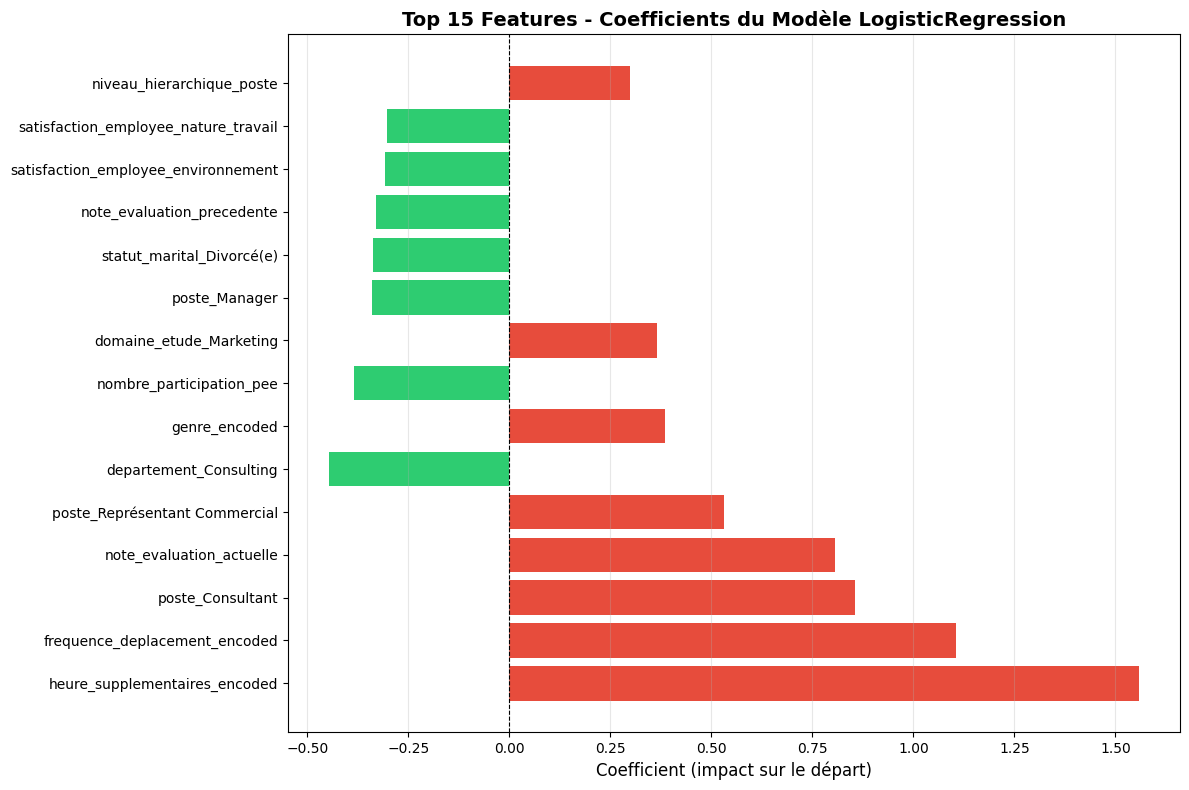


💡 INTERPRÉTATION :
  • Coefficient POSITIF (rouge) → Augmente le risque de départ
  • Coefficient NÉGATIF (vert) → Diminue le risque de départ



In [18]:

print("="*80)
print("ÉTAPE 9.1 : FEATURE IMPORTANCE - COEFFICIENTS DU MODÈLE")
print("="*80)

# Récupérer les noms des features après encodage
feature_names = X_train.columns.tolist()

# Récupérer les coefficients du modèle
coefficients = log_balanced.coef_[0]

# Créer un DataFrame pour analyser
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

# Afficher les top 15
print("\n📊 TOP 15 FEATURES LES PLUS IMPORTANTES (valeur absolue):\n")
print(coef_df.head(15).to_string(index=False))

# Visualisation
fig, ax = plt.subplots(figsize=(12, 8))
top_15 = coef_df.head(15)
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in top_15['Coefficient']]
ax.barh(range(len(top_15)), top_15['Coefficient'], color=colors)
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels(top_15['Feature'])
ax.set_xlabel('Coefficient (impact sur le départ)', fontsize=12)
ax.set_title('Top 15 Features - Coefficients du Modèle LogisticRegression', 
             fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 INTERPRÉTATION :")
print("  • Coefficient POSITIF (rouge) → Augmente le risque de départ")
print("  • Coefficient NÉGATIF (vert) → Diminue le risque de départ")
print("\n" + "="*80)

In [19]:
# ============================================================================
# ÉTAPE 9.2 : FEATURE IMPORTANCE GLOBALE - SHAP
# ============================================================================
print("="*80)
print("ÉTAPE 9.2 : FEATURE IMPORTANCE GLOBALE - SHAP")
print("="*80)

print("\n⏳ Création de l'explainer SHAP pour LogisticRegression...")
print("   (Cela peut prendre 30-60 secondes)")

# Créer l'explainer SHAP pour LogisticRegression
explainer = shap.LinearExplainer(log_balanced, X_train)

# Calculer les SHAP values sur le jeu de test
shap_values = explainer.shap_values(X_test)

print("✅ SHAP values calculées avec succès !\n")

# Informations
print(f"📊 Dimensions des SHAP values : {shap_values.shape}")
print(f"   → {shap_values.shape[0]} observations (X_test)")
print(f"   → {shap_values.shape[1]} features")

print("\n" + "="*80)

ÉTAPE 9.2 : FEATURE IMPORTANCE GLOBALE - SHAP

⏳ Création de l'explainer SHAP pour LogisticRegression...
   (Cela peut prendre 30-60 secondes)
✅ SHAP values calculées avec succès !

📊 Dimensions des SHAP values : (294, 40)
   → 294 observations (X_test)
   → 40 features



## Visualisation du SHAP

📊 Création des visualisations SHAP...

1️⃣ BEESWARM PLOT - Impact des features sur chaque prédiction
   (montre la distribution des valeurs SHAP)


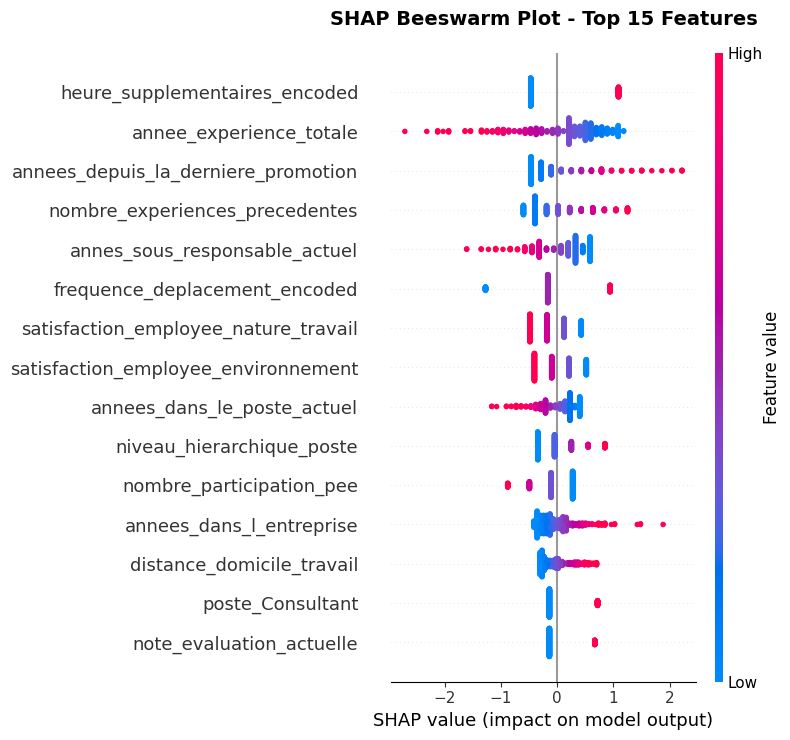


────────────────────────────────────────────────────────────────────────────────

2️⃣ BAR PLOT - Importance moyenne (valeur absolue)
   (impact global de chaque feature)


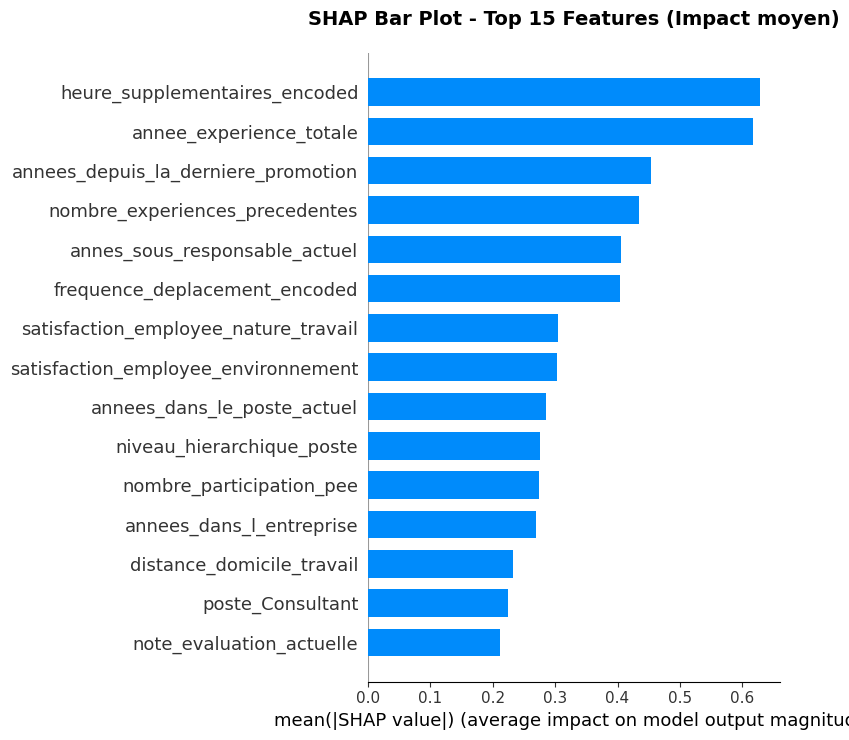


💡 COMMENT LIRE LE BEESWARM PLOT :
  • Axe X : Valeur SHAP (impact sur la prédiction)
    - Positif (droite) = Augmente le risque de départ
    - Négatif (gauche) = Diminue le risque de départ
  • Couleur : Valeur de la feature
    - Rouge = Valeur élevée de la feature
    - Bleu = Valeur faible de la feature
  • Chaque point = Une observation



In [20]:
# ============================================================================
# VISUALISATIONS SHAP
# ============================================================================

print("📊 Création des visualisations SHAP...\n")

# 1. BEESWARM PLOT - Vue détaillée de l'impact de chaque feature
print("1️⃣ BEESWARM PLOT - Impact des features sur chaque prédiction")
print("   (montre la distribution des valeurs SHAP)")
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test, max_display=15, show=False)
plt.title('SHAP Beeswarm Plot - Top 15 Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "─"*80 + "\n")

# 2. BAR PLOT - Feature importance agrégée
print("2️⃣ BAR PLOT - Importance moyenne (valeur absolue)")
print("   (impact global de chaque feature)")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=15, show=False)
plt.title('SHAP Bar Plot - Top 15 Features (Impact moyen)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 COMMENT LIRE LE BEESWARM PLOT :")
print("  • Axe X : Valeur SHAP (impact sur la prédiction)")
print("    - Positif (droite) = Augmente le risque de départ")
print("    - Négatif (gauche) = Diminue le risque de départ")
print("  • Couleur : Valeur de la feature")
print("    - Rouge = Valeur élevée de la feature")
print("    - Bleu = Valeur faible de la feature")
print("  • Chaque point = Une observation")

print("\n" + "="*80)

## Analyse comparative : Coefficients vs SHAP

ÉTAPE 9.3 : COMPARAISON - COEFFICIENTS vs SHAP

📊 TOP 15 FEATURES - COMPARAISON :

                             Feature  Abs_Coefficient  SHAP_Importance
       heure_supplementaires_encoded         1.559450         0.629084
             annee_experience_totale         0.000000         0.617508
 annees_depuis_la_derniere_promotion         0.000000         0.453307
      nombre_experiences_precedentes         0.000000         0.433694
       annes_sous_responsable_actuel         0.000000         0.406177
       frequence_deplacement_encoded         1.106349         0.404532
satisfaction_employee_nature_travail         0.303613         0.304770
 satisfaction_employee_environnement         0.307345         0.302495
         annees_dans_le_poste_actuel         0.000000         0.284511
           niveau_hierarchique_poste         0.298235         0.276121
            nombre_participation_pee         0.384606         0.274248
            annees_dans_l_entreprise         0.000000         0.2

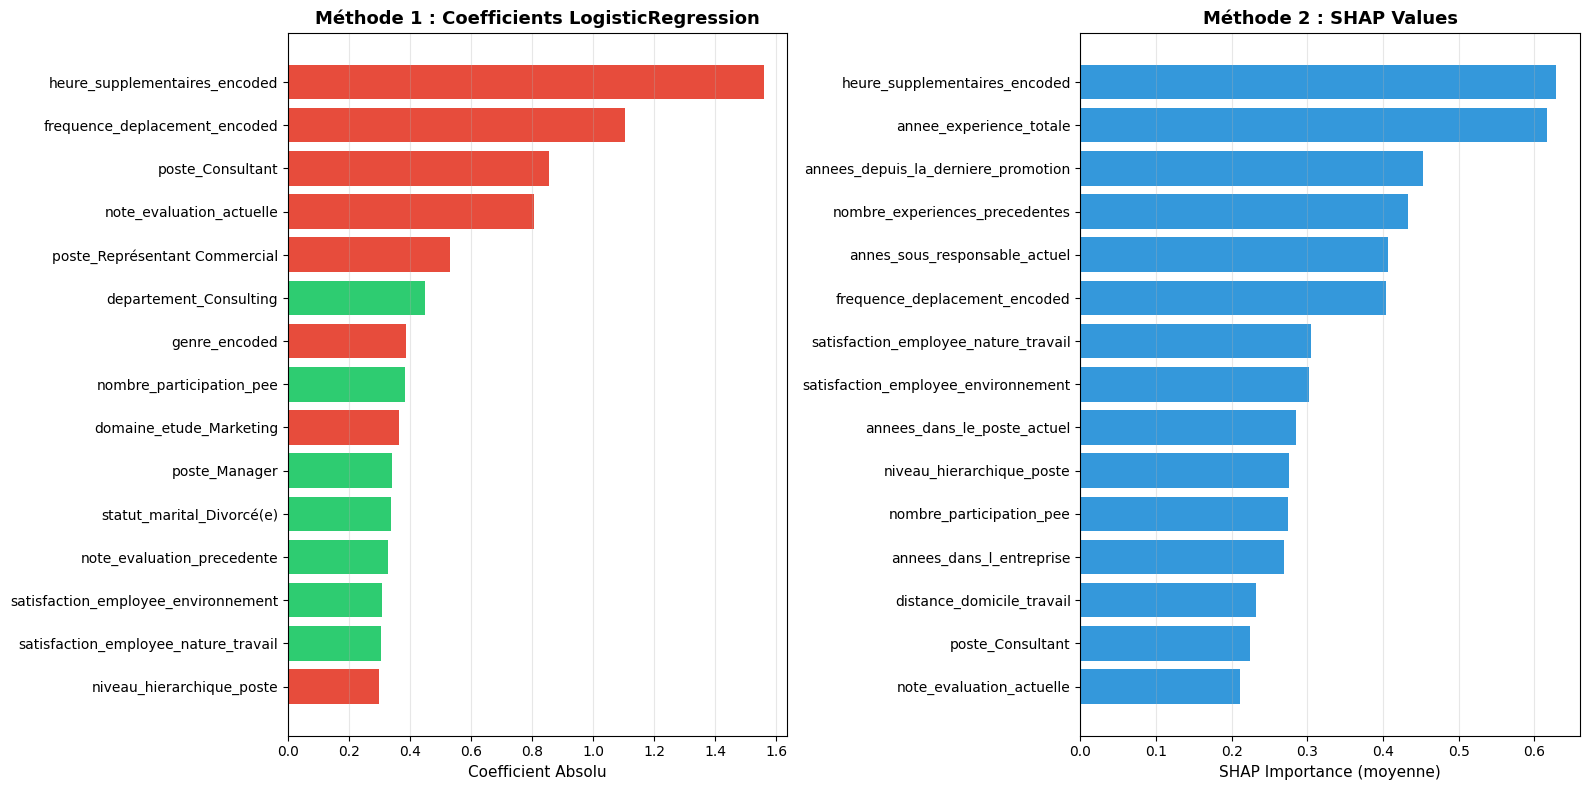


💡 OBSERVATIONS :
  • Les deux méthodes devraient donner des résultats similaires
  • SHAP prend en compte les interactions entre features
  • Les coefficients donnent l'impact linéaire direct

✅ ÉTAPE 9.3 TERMINÉE


In [21]:
# ============================================================================
# ÉTAPE 9.3 : COMPARAISON COEFFICIENTS vs SHAP
# ============================================================================
print("="*80)
print("ÉTAPE 9.3 : COMPARAISON - COEFFICIENTS vs SHAP")
print("="*80)

# Calculer l'importance moyenne SHAP
shap_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'SHAP_Importance': np.abs(shap_values).mean(axis=0)
}).sort_values('SHAP_Importance', ascending=False)

# Fusionner avec les coefficients
comparison_df = pd.merge(
    coef_df[['Feature', 'Abs_Coefficient']].head(15),
    shap_importance[['Feature', 'SHAP_Importance']].head(15),
    on='Feature',
    how='outer'
).fillna(0).sort_values('SHAP_Importance', ascending=False)

print("\n📊 TOP 15 FEATURES - COMPARAISON :\n")
print(comparison_df.to_string(index=False))

# Visualisation comparative
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Coefficients
top_coef = coef_df.head(15)
colors_coef = ['#e74c3c' if x > 0 else '#2ecc71' for x in top_coef['Coefficient']]
axes[0].barh(range(len(top_coef)), top_coef['Abs_Coefficient'], color=colors_coef)
axes[0].set_yticks(range(len(top_coef)))
axes[0].set_yticklabels(top_coef['Feature'])
axes[0].set_xlabel('Coefficient Absolu', fontsize=11)
axes[0].set_title('Méthode 1 : Coefficients LogisticRegression', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# SHAP
top_shap = shap_importance.head(15)
axes[1].barh(range(len(top_shap)), top_shap['SHAP_Importance'], color='#3498db')
axes[1].set_yticks(range(len(top_shap)))
axes[1].set_yticklabels(top_shap['Feature'])
axes[1].set_xlabel('SHAP Importance (moyenne)', fontsize=11)
axes[1].set_title('Méthode 2 : SHAP Values', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 OBSERVATIONS :")
print("  • Les deux méthodes devraient donner des résultats similaires")
print("  • SHAP prend en compte les interactions entre features")
print("  • Les coefficients donnent l'impact linéaire direct")

print("\n" + "="*80)
print("✅ ÉTAPE 9.3 TERMINÉE")
print("="*80)

## Feature Importance Locale - SHAP Waterfall

ÉTAPE 9.4 : FEATURE IMPORTANCE LOCALE - EXEMPLES INDIVIDUELS

📊 Nombre d'employés partis dans le test : 47
📊 Nombre d'employés restés dans le test : 247

────────────────────────────────────────────────────────────────────────────────
🔴 ANALYSE : 3 EMPLOYÉS QUI SONT PARTIS
────────────────────────────────────────────────────────────────────────────────

EXEMPLE 1 - Employé parti (index 4)


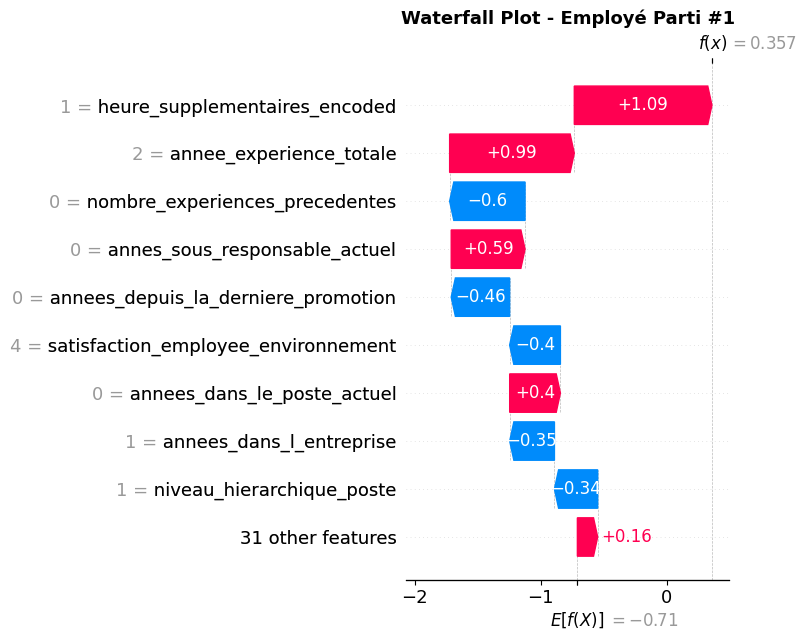


EXEMPLE 2 - Employé parti (index 35)


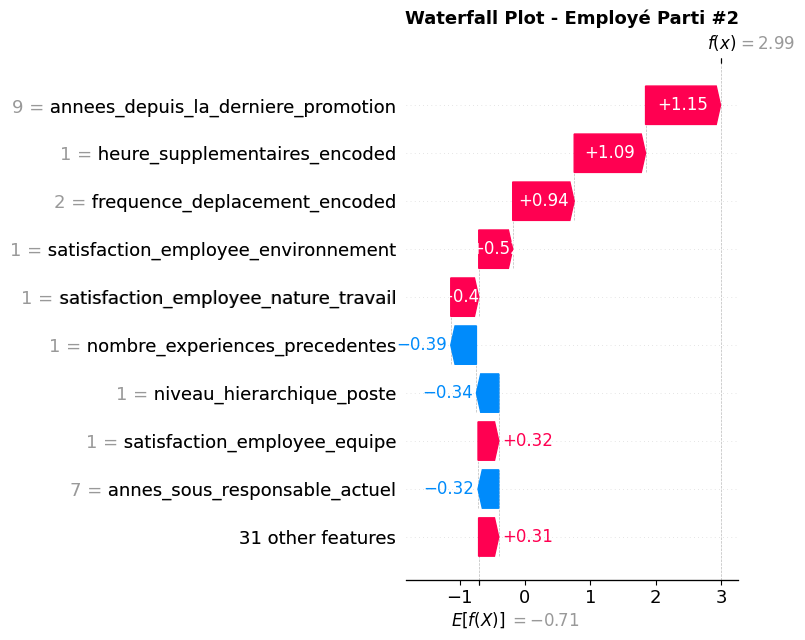


EXEMPLE 3 - Employé parti (index 82)


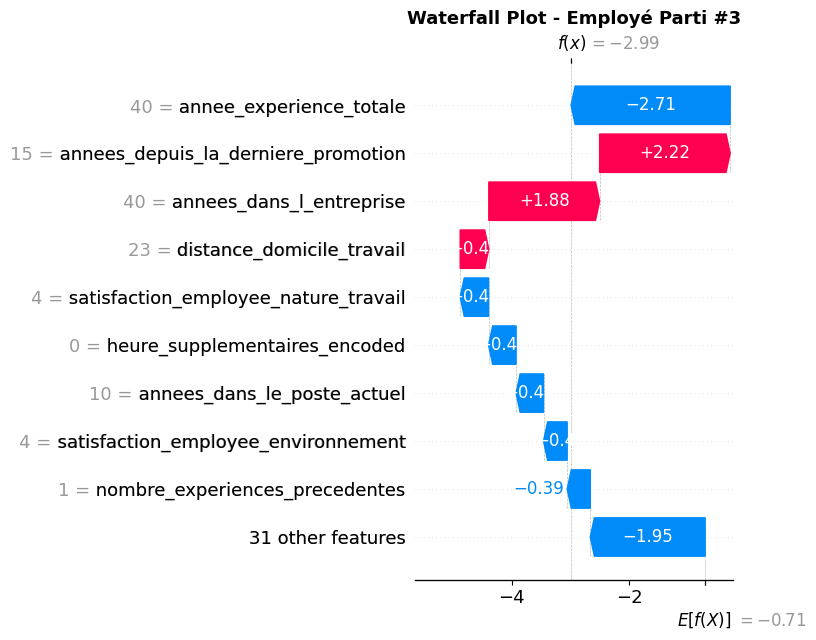


────────────────────────────────────────────────────────────────────────────────
🟢 ANALYSE : 3 EMPLOYÉS QUI SONT RESTÉS
────────────────────────────────────────────────────────────────────────────────

EXEMPLE 1 - Employé resté (index 0)


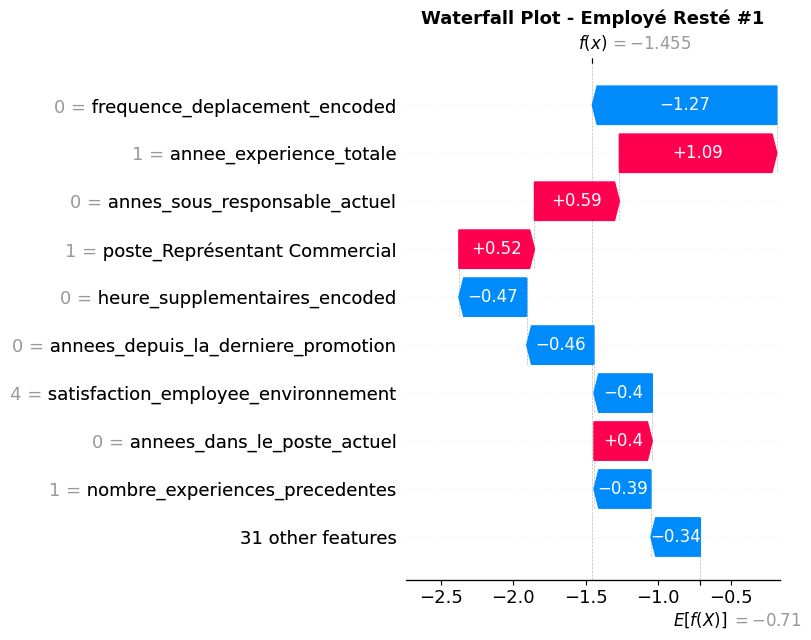


EXEMPLE 2 - Employé resté (index 6)


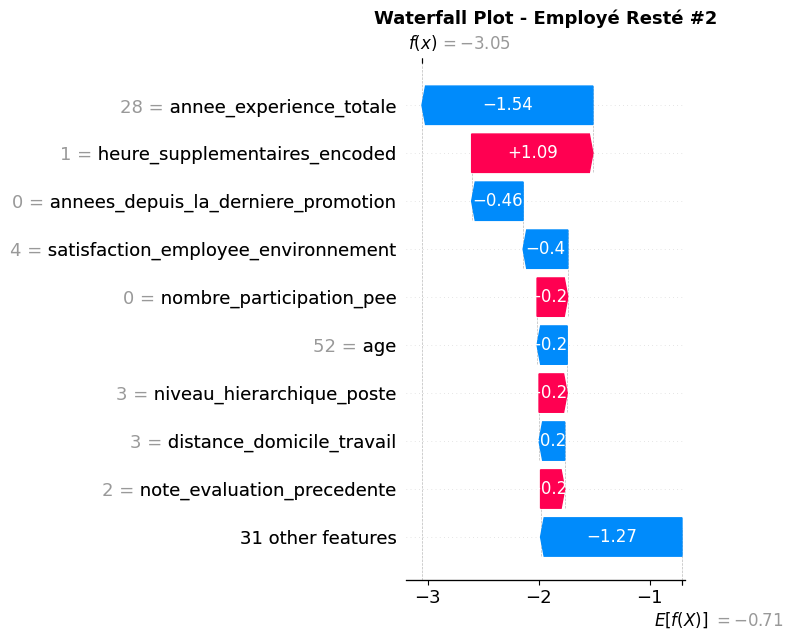


EXEMPLE 3 - Employé resté (index 11)


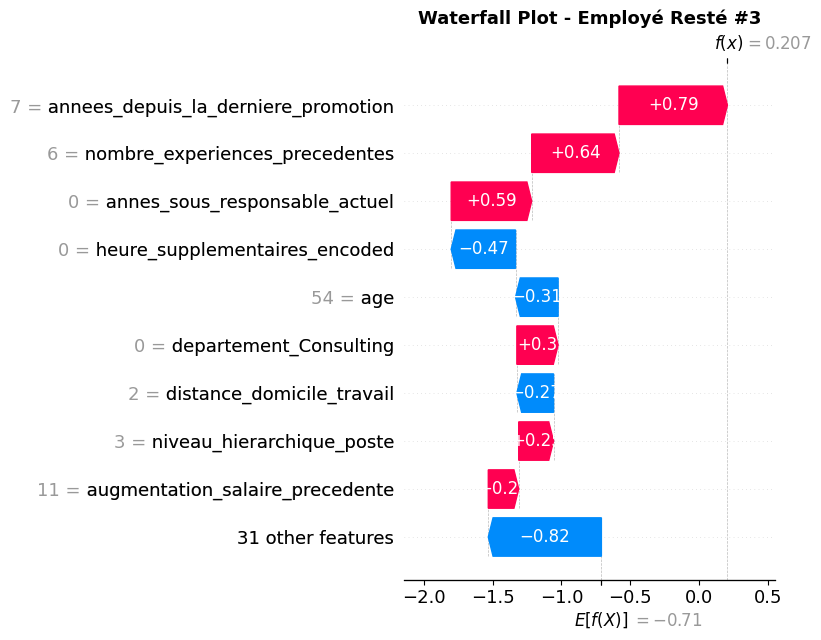


💡 COMMENT LIRE LE WATERFALL PLOT :
  • Base value (f(x)) : Prédiction moyenne du modèle
  • Flèches rouges (→) : Poussent vers le DÉPART
  • Flèches bleues (←) : Poussent vers la RÉTENTION
  • f(x) final : Prédiction pour cet employé spécifique

✅ ÉTAPE 9.4 TERMINÉE


In [22]:
# ============================================================================
# ÉTAPE 9.4 : FEATURE IMPORTANCE LOCALE - WATERFALL PLOTS
# ============================================================================
print("="*80)
print("ÉTAPE 9.4 : FEATURE IMPORTANCE LOCALE - EXEMPLES INDIVIDUELS")
print("="*80)

# Identifier des exemples intéressants
# 1. Exemples de DÉPARTS (y_test = 1)
indices_partis = np.where(y_test == 1)[0]
print(f"\n📊 Nombre d'employés partis dans le test : {len(indices_partis)}")

# 2. Exemples de RÉTENTIONS (y_test = 0)
indices_restes = np.where(y_test == 0)[0]
print(f"📊 Nombre d'employés restés dans le test : {len(indices_restes)}")

# Sélectionner 3 exemples de chaque catégorie
exemples_partis = [0, 5, 10]  # Indices dans indices_partis
exemples_restes = [0, 5, 10]  # Indices dans indices_restes

print("\n" + "─"*80)
print("🔴 ANALYSE : 3 EMPLOYÉS QUI SONT PARTIS")
print("─"*80)

for i, exemple_idx in enumerate(exemples_partis, 1):
    if exemple_idx < len(indices_partis):
        idx = indices_partis[exemple_idx]
        
        print(f"\n{'='*60}")
        print(f"EXEMPLE {i} - Employé parti (index {idx})")
        print(f"{'='*60}")
        
        # Créer le Waterfall plot
        plt.figure(figsize=(10, 6))
        shap.waterfall_plot(
            shap.Explanation(
                values=shap_values[idx],
                base_values=explainer.expected_value,
                data=X_test.iloc[idx],
                feature_names=X_test.columns.tolist()
            ),
            max_display=10,
            show=False
        )
        plt.title(f'Waterfall Plot - Employé Parti #{i}', fontsize=13, fontweight='bold')
        plt.tight_layout()
        plt.show()

print("\n" + "─"*80)
print("🟢 ANALYSE : 3 EMPLOYÉS QUI SONT RESTÉS")
print("─"*80)

for i, exemple_idx in enumerate(exemples_restes, 1):
    if exemple_idx < len(indices_restes):
        idx = indices_restes[exemple_idx]
        
        print(f"\n{'='*60}")
        print(f"EXEMPLE {i} - Employé resté (index {idx})")
        print(f"{'='*60}")
        
        # Créer le Waterfall plot
        plt.figure(figsize=(10, 6))
        shap.waterfall_plot(
            shap.Explanation(
                values=shap_values[idx],
                base_values=explainer.expected_value,
                data=X_test.iloc[idx],
                feature_names=X_test.columns.tolist()
            ),
            max_display=10,
            show=False
        )
        plt.title(f'Waterfall Plot - Employé Resté #{i}', fontsize=13, fontweight='bold')
        plt.tight_layout()
        plt.show()

print("\n💡 COMMENT LIRE LE WATERFALL PLOT :")
print("  • Base value (f(x)) : Prédiction moyenne du modèle")
print("  • Flèches rouges (→) : Poussent vers le DÉPART")
print("  • Flèches bleues (←) : Poussent vers la RÉTENTION")
print("  • f(x) final : Prédiction pour cet employé spécifique")

print("\n" + "="*80)
print("✅ ÉTAPE 9.4 TERMINÉE")
print("="*80)